In [1]:
from emoji_playground import *
from PIL import Image
import matplotlib.pyplot as plt
import requests

def show(img , cmap = "gray"):
    plt.imshow(img , cmap)
    plt.axis("off")

In [2]:
current_emoji = "🐶" #"🐱"#"🦚"
current_filter_name = current_filter_name
emoji_code = "-".join(f"{ord(c):x}" for c in current_emoji).upper()
url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/618x618/{emoji_code}.png"
emoji_data = Image.open(requests.get(url, stream=True).raw)
emoji_data = np.array(emoji_data.convert("RGBA"))


/Users/jan-hendrik/projects/pyscript-emoji-skimage/emoji_skimage_env/lib/python3.10/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


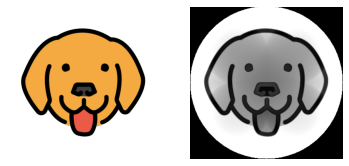

In [3]:
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = filter_names[current_filter_name](emoji_data)
show(filtered_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


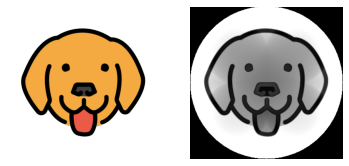

In [4]:
current_filter_name ='radon_iradon'
plt.subplot(1,2,1)
show(emoji_data)

plt.subplot(1,2,2)
filtered_image = filter_names[current_filter_name](emoji_data)
show(filtered_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


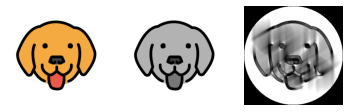

In [5]:
current_emoji = "🐶" #"🐱"#"🦚"
current_filter_name = current_filter_name
emoji_code = "-".join(f"{ord(c):x}" for c in current_emoji).upper()
url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/618x618/{emoji_code}.png"
emoji_data = Image.open(requests.get(url, stream=True).raw)
emoji_data = np.array(emoji_data.convert("RGBA"))

from skimage.transform import radon, rescale
from skimage.color import rgba2rgb,rgb2gray, gray2rgb
from skimage.transform import iradon

def radon_iradon(emoji_data):
    image = rgb2gray(rgba2rgb(emoji_data)) # remove alpha channel and convert to gray
    image = rescale(image, scale=0.5, mode='reflect', channel_axis=None)
    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)
    reconstruction_fbp = iradon(sinogram[:,:-100], theta=theta[:-100], filter_name='shepp-logan')
    return gray2rgb(abs(reconstruction_fbp))

plt.subplot(1,3,1)
plt.imshow(emoji_data , "gray")
plt.axis("off")
plt.subplot(1,3,2)
img = rgb2gray(rgba2rgb(emoji_data))
plt.imshow(img , "gray")
plt.axis("off")
plt.subplot(1,3,3)
filtered_image = radon_iradon(emoji_data)
show(filtered_image)

(-0.5, 617.5, 617.5, -0.5)

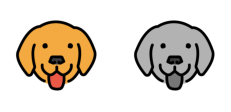

In [58]:
plt.subplot(1,3,1)
from skimage.color import rgba2rgb
img_rgb = rgba2rgb(emoji_data)

plt.imshow(img_rgb)
plt.axis("off")
plt.subplot(1,3,2)
img = rgb2gray(img_rgb)
plt.imshow(img , "gray")
plt.axis("off")